1. Creación de Usuarios Developer y solicitud de perfil "Elevated".
2. Definición de Archivo Config con las Credenciales: 
- api_key
- api_key_secret
- access_token 
- access_token_secret
3. Instalación de Librerías: tweepy, nltk
4. Creación de Request
5. Construcción de DataFrame
6. EDA: Histogramas de Frecuencia, Cloudwords, etc.

In [1]:
pip install nltk

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tweepy
import configparser
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
#nltk.download('stopwords')


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
#ENLACE DE YOUTUBE!! --> https://www.youtube.com/watch?v=Lu1nskBkPJU

#read configs
config=configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token= config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

from datetime import date, timedelta
dt = date.today() - timedelta(7)

#Candidato a Consultar
candidato = 'Fico Gutierrez'
screen_name = 'Fico Gutierrezgustavo'

#public_tweets = api.home_timeline()
public_tweets = api.search_tweets(q=candidato, until=dt, count=100)
#print(public_tweets[0].created_at)



2022-04-22


In [6]:
columns = ['Time', 'User', 'Tweet']
data = []
personal_tweets = api.user_timeline(screen_name = screen_name, count=1000, include_rts = True)
#people_tweets = api.search_tweets(q=candidato, until=dt, count=1000)

for tweet in public_tweets:
      data.append([tweet.created_at, tweet.user.screen_name, tweet.text])

created_tweets_Fico Gutierrez = pd.DataFrame(data,columns=columns)

In [7]:
from datetime import date, timedelta
dt = date.today() - timedelta(7)

#Candidato a Consultar
candidato = 'Fico Gutierrez'
screen_name = 'Fico Gutierrezgustavo'


def create_dataframe(query, delta):
    
    dt = date.today() - timedelta(delta)
    #public_tweets = api.home_timeline()
    public_tweets = api.search_tweets(q = query, until = dt, count = 100)
    columns = ['Time', 'User', 'Tweet']
    data = []
    for tweet in public_tweets:
        data.append([tweet.created_at, tweet.user.screen_name, tweet.text])
    df = pd.DataFrame(data,columns=columns)
    return df

In [8]:
personal_tweets = api.user_timeline(screen_name = screen_name, count=100, include_rts = True)

In [9]:
df1 = create_dataframe(candidato, 7)
df2 = create_dataframe(candidato, 6)
df3 = create_dataframe(candidato, 5)
df4 = create_dataframe(candidato, 4)
df5 = create_dataframe(candidato, 3)
df6 = create_dataframe(candidato, 2)
df7 = create_dataframe(candidato, 1)

df_list = [df1, df2, df3, df4, df5, df6, df7]

In [10]:
df_Fico Gutierrez = pd.concat(df_list)
df_Fico Gutierrez.info()
df_Fico Gutierrez.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Time    700 non-null    datetime64[ns, UTC]
 1   User    700 non-null    object             
 2   Tweet   700 non-null    object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 21.9+ KB


,Time,User,Tweet
0,2022-04-21 23:59:59+00:00,marvapadeu,RT @Latrinchera18: @Fico Gutierrezgustavo Diario Chino ...
1,2022-04-21 23:59:59+00:00,Ephrainroux,"@PabloSn16784630 @Jokeraton ""HISTORICO PACTO""...."
2,2022-04-21 23:59:58+00:00,Carmarulo1,RT @GUIVALO: Le sugiero a todos los candidatos...
3,2022-04-21 23:59:58+00:00,AnaSztajnszraj,@badel_eduardo @CesarPachonAgro Los Pitbull qu...
4,2022-04-21 23:59:58+00:00,parismu22,RT @DonIzquierdo_: ¿No les parece indignante q...


In [18]:
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_Fico Gutierrez = pd.concat(df_list)

#all_stopwords = stopwords.words('english')
remove_words = ['RT','en', 'las', 'los','el', 'de', 'el', 'la', 'ArgiroCasta888', 'que', 'es', 'un', 'se', 'con', 'lo', 'por', 'las', '@', ':', 
'nicoFico GutierrezB', ',', '.', '-', 'de' , 'Fico Gutierrez', 'gustavo', 'Fico Gutierrezgustavo', 'gustavoFico Gutierrez', 'más', 'así', '  list', 'La', 'mas', 'https', '/',
 'Gustavo Fico Gutierrez', 'Fico Gutierrez', 'Gustavo', 'List', 'para', 'su', 'del', "'", 'AmandaCorrea29', 'le','nicolasFico GutierrezB', 'conFico Gutierrezhastaelfinal', 'luisalfonsoesc',
 'a', 'no', 'qu', 'qué', 'vu', 'una', 'al', 'y', 'r', 's', 're', 'pe', 'entre', 'object', 'dtype', 'dona_pily2', 'diamaov', 'danielbricen', 'como', 'mi',
 'name', 'cada', 'Lenght', 'lenght', 't', 'n', 'co', 'o', 'de', 'estos', 'sus', 'pero', 'me', 'está', 'da', 'ha', 'son', 'muy', 'sea', 'tiene', 'ya', 'nos',
  'ser', 'piedadcordoba', 'ficogutierrez', 'fue', 'C', 'c', 'NoticiasCaracol', 'JANDR3S', 'noticiascaracol']

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

def draw_word_cloud(df, title):
    loc_df = df#.loc[df.user_location==location]
    loc_df.loc[:, 'Tweet'] = loc_df['Tweet']
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(remove_words),
                    max_words=80,
                    max_font_size=50,
                    scale=1,
                    random_state=1).generate(str(loc_df['Tweet']))
    fig = plt.figure(1, figsize=(12,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [12]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df):
    tweets_from_loc = df#.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'Tweet'] = tweets_from_loc['Tweet']
    loc_tweets_curated = tweets_from_loc['Tweet'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words in {}")#.format(location))
    plt.xticks(rotation='vertical');

In [198]:
#draw_bar_graph_for_text_visualization(df_Fico Gutierrez)

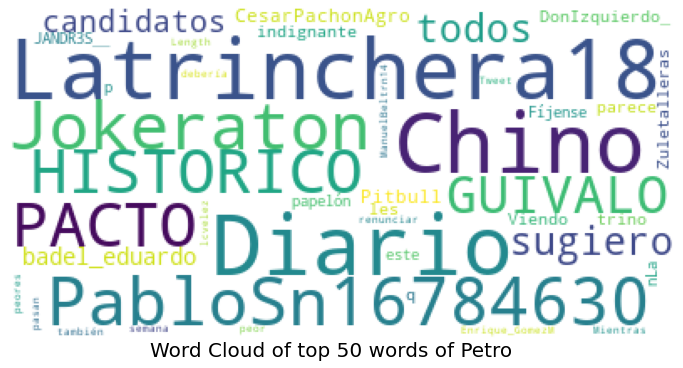

In [19]:
draw_word_cloud(created_tweets_Fico Gutierrez,  'Word Cloud of top 50 words of Fico Gutierrez')

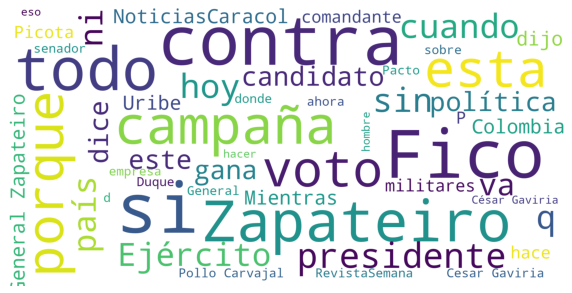

In [13]:
text = df_Fico Gutierrez['Tweet'].values 
wordcloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    stopwords=set(remove_words),
                    max_font_size=50,
                    scale=5,
).generate(str(text))
fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

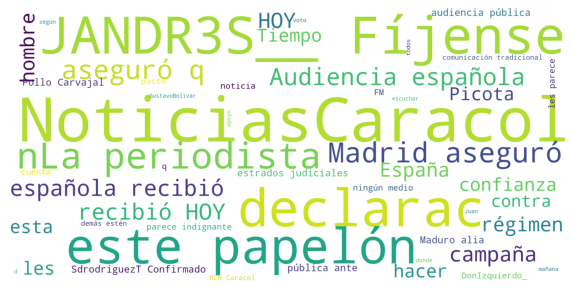

In [17]:
text = created_tweets_Fico Gutierrez['Tweet'].values 


wordcloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    stopwords=set(remove_words),
                    max_font_size=50,
                    scale=5,
).generate(str(text))
fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()